# Use of ISA-Tools for Metadata
Tyler Biggs
Aurora Clark Laboratory

Based on the recommendations from our contacts at PNNL (Nathan Baker), I have elected to use the Python API for ISA-tools to handle metadata and database organisation.

## Core Entities

1. **Investigation**: Records metadata related to the investigation. Links related studies under an investigation.
2. **Study**: - Experimental Steps or sequence of events.
3. **Assay**: - A specific instrumental measurement (in our case).

## ISA-Tool Links

https://isatools.readthedocs.io/en/latest/

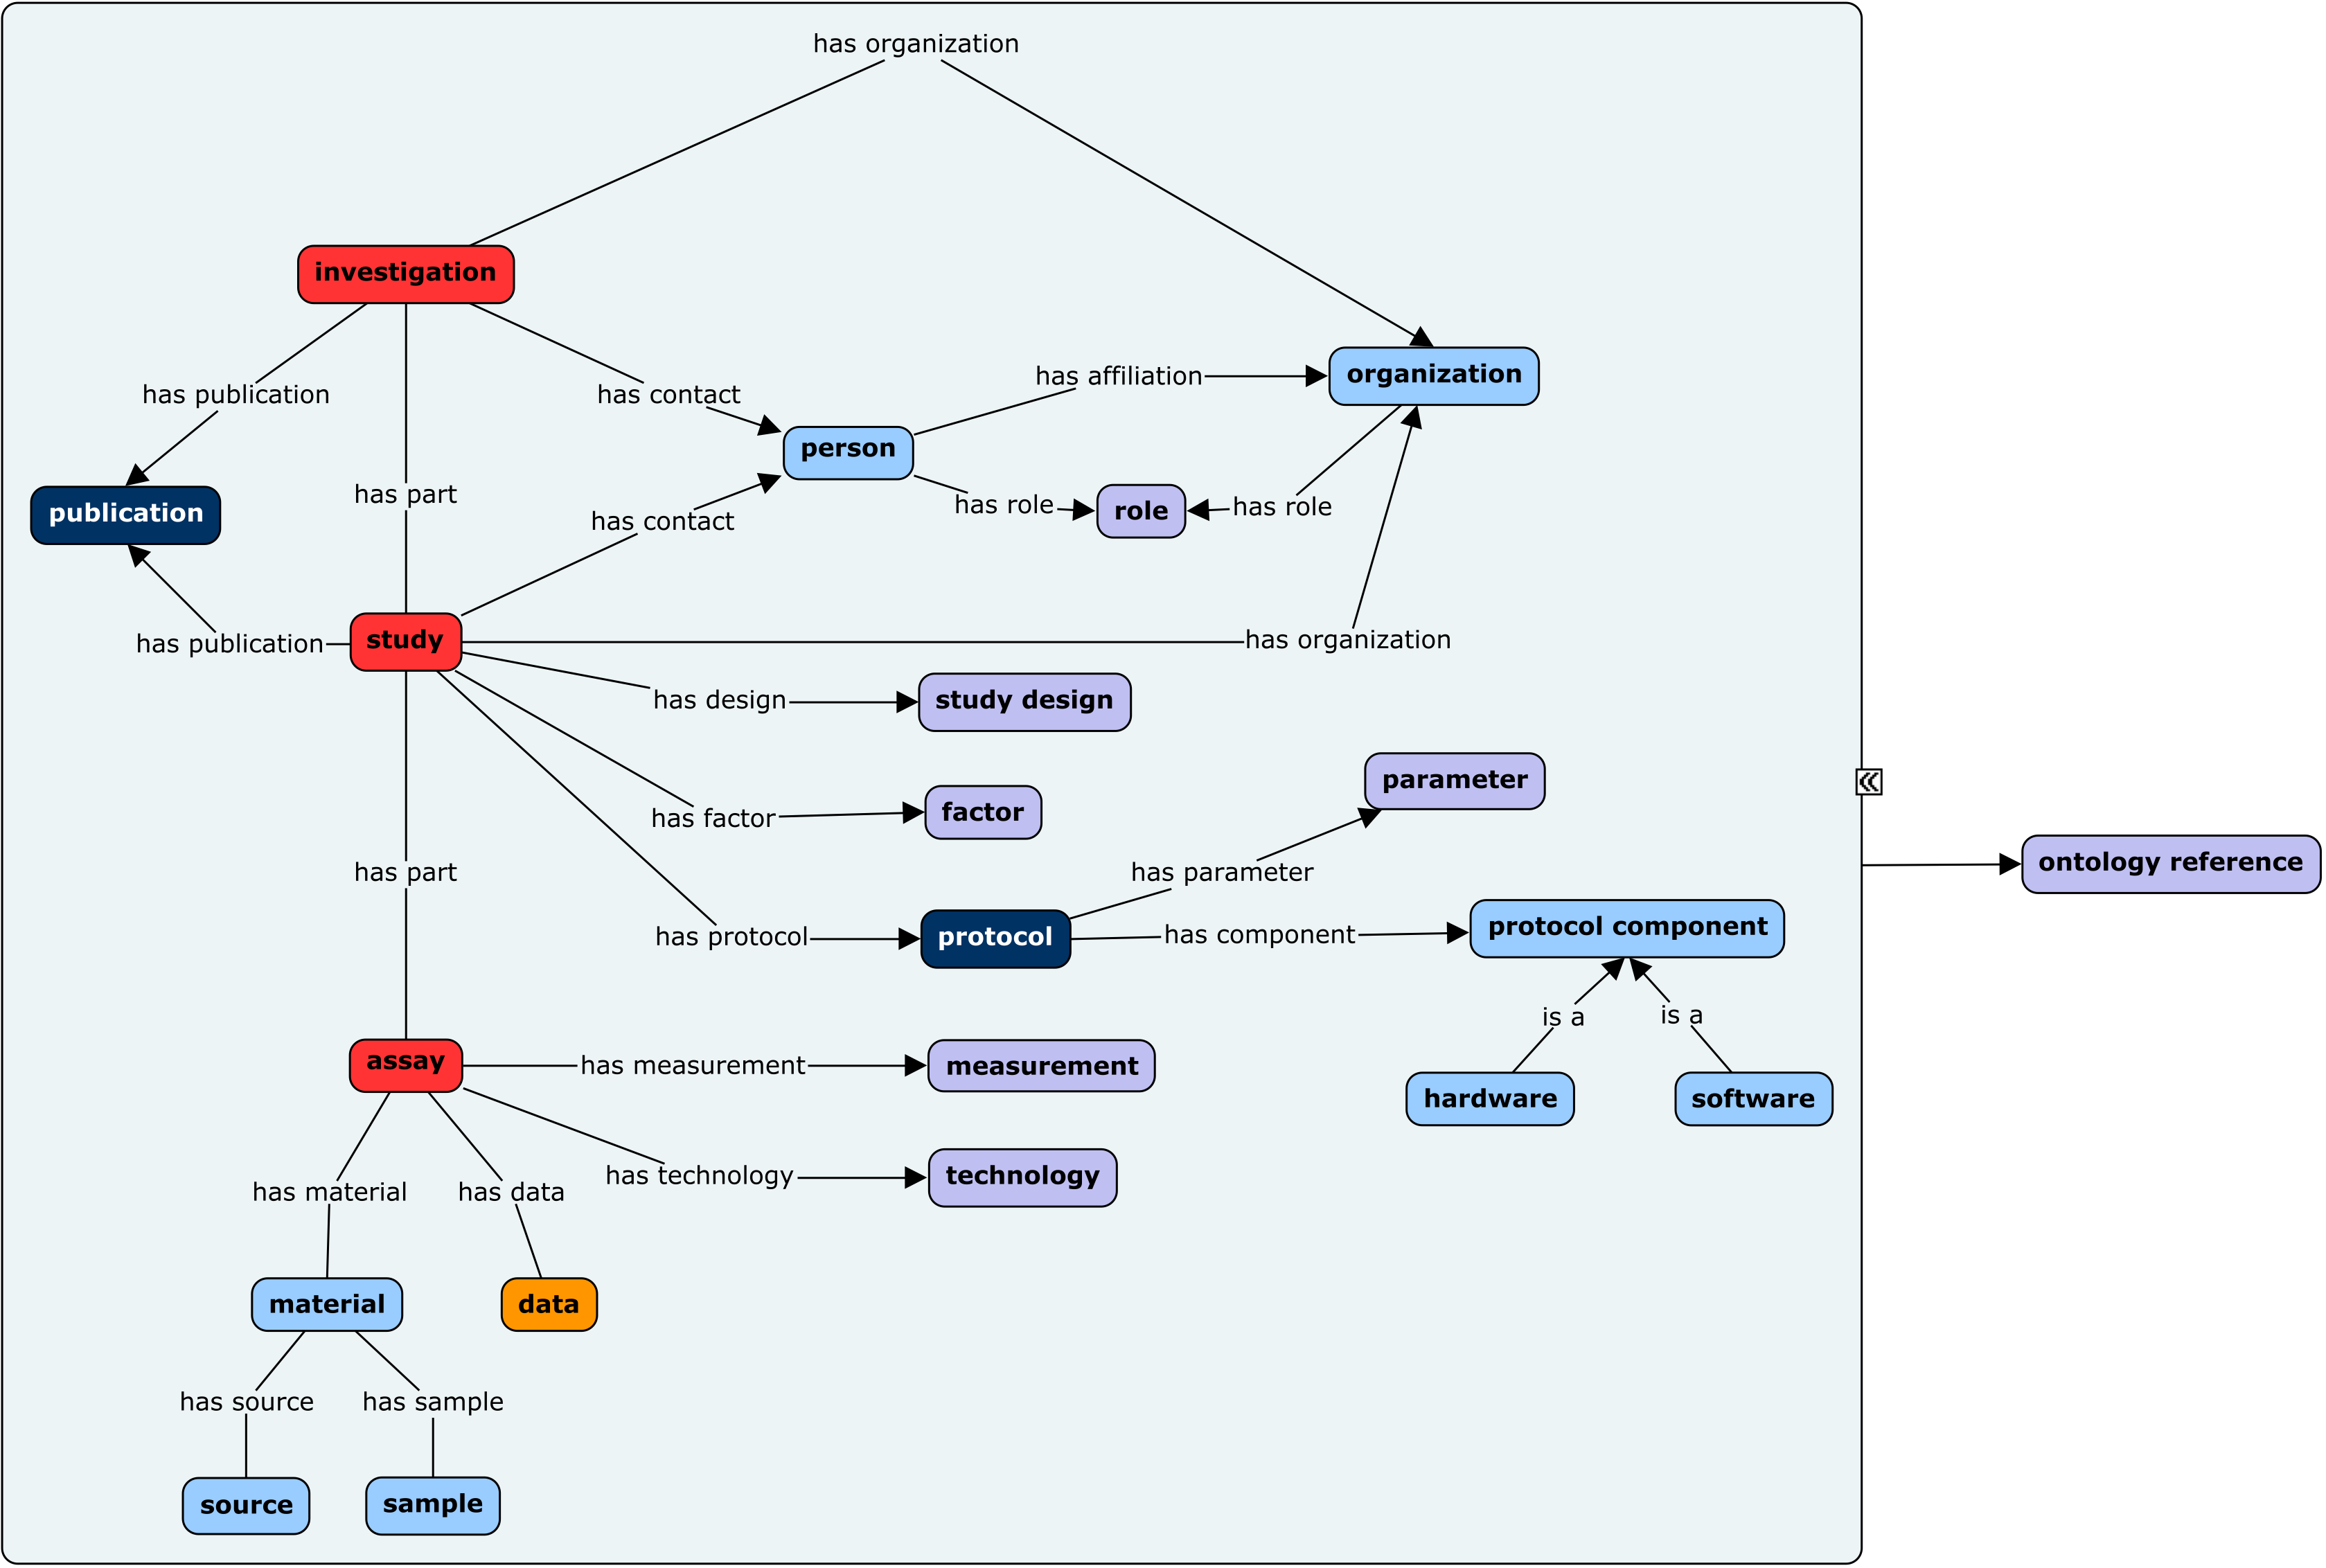

### Data files

Going to generate my own child class to handle the types of data I want to store.

First here is the image of the data I will be extracting:

![Sipos 2006](data/sipos2006_fig2.png)

**Caption**: 27 Al NMR chemical shift vs. the total concentration of NaOH (M) at var-
ious aluminium concentrations. [Al(III)] T = 0.005 M (+); 0.050 M (); 0.100 M
(); 0.396 M (); 0.800 M (); 1.20 M ( ); 2.00 M (); 3.00 M (×).

An example block of data from this plot (the `+` points in this case):

    Al(III) = 0.005 M
    
    [NaOH]   ppm
    ------   -----
     1.00    80.45
     4.99    80.04
     7.01    79.59
    11.01    78.13
    13.03    76.93
    17.00    73.64
    18.96    71.80
    
    

In [1]:
# Import the python API model
from isatools.model.v1 import *

# Import JSON for the output format.
from isatools.isajson import ISAJSONEncoder
import json

In [2]:
class digitizedImageData(DataFile):
    def __init__(self, filename='', id_='', generated_from=None, comments=None):
        super().__init__(filename=filename, id_=id_, generated_from=generated_from, comments=comments)
        self.label = "Plot-csv-extract"

In [3]:
# I am going to create some derivative classes of DataFile
# to better classify how we have to import literature data.
class spectralImage(DataFile):
    def __init__(self, filename='', id_='', generated_from=None, comments=None):
        super().__init__(filename=filename, id_=id_, generated_from=generated_from, comments=comments)
        self.label = "Plot-image"

In [4]:
# Declare the overarching investigation
# This object ties the other entries together.
inv = Investigation(
    identifier="Al_investigation",
    title="Aluminate Investigation",
    description="An investigation into the properties of aluminate."
)

In [5]:
# Define Ontology references
# Units should be implemented as Ontology Annotations
# Annotations should have an Ontology Source
amount_concentration = OntologySource(name='Amount Concentration',
                         file='https://goldbook.iupac.org/html/A/A00295.html')

molarity = OntologyAnnotation(term='Molarity',
                             term_source=amount_concentration,
                             term_accession='https://goldbook.iupac.org/html/M/M03977.html')

In [6]:
# Declare the study of interest (divide these by what?)
nmr_study = Study(
    identifier="nmr_study",
    title="NMR Studies",
    description="27 Al NMR Spectra.",
)

inv.studies.append(nmr_study)

In [7]:
# First it looks like we will need some Material Classes
# Materials need an associated ontology annotation describing the material.

# ONTOLOGY SOURCES
Aluminium = OntologySource(name='Aluminium',
                         file='https://en.wikipedia.org/wiki/Aluminium')

Hydroxide = OntologySource(name='Hydroxide', 
                           file='https://en.wikipedia.org/wiki/Hydroxide')

NMR = OntologySource(name='Nuclear Magentic Resonance')

# ONTOLOGY ANNOTATIONS
al_III = OntologyAnnotation(term='Al(III)',
                            term_source=Aluminium, 
                            term_accession='https://en.wikipedia.org/wiki/Aluminate')

Sodium_Hydroxide = OntologyAnnotation(term='Sodium Hydroxide', 
                          term_source=Hydroxide, 
                          term_accession='https://en.wikipedia.org/wiki/Sodium_hydroxide')

ppm = OntologyAnnotation(term="ppm", term_source=NMR)

Al27_NMR = OntologyAnnotation(term="27 Al NMR",
                             term_source=NMR)



In [8]:
# The assay represents a test preformed on a material.
# Data files that an assay produces should be linked here.
sipos_nmr_assay = Assay(
    measurement_type=ppm,
    technology_type=Al27_NMR,
    technology_platform="Bruker",
    units=[ppm, molarity],)

In [10]:
# Append the materials to the assay
# sipos_nmr_assay.materials['samples'].append(NaOH)
# sipos_nmr_assay.materials['samples'].append(Al_III)

In [11]:
sipos_2006_publication = Publication(
    title="\ce{^{27}Al} NMR and Raman spectroscopic studies of alkaline aluminate\
    solutions with extremely high caustic content\
    - Does the octahedral species \ce{Al(OH)6^{-3}} exist in solution?",
    doi="10.1016/j.talanta.2006.02.008")

In [12]:
# Now create an instance of the spectralImage:
sipos2006fig2 = spectralImage(filename="data/sipos2006_fig2.png")

In [13]:
# Now a data entry.
sipos2006data = digitizedImageData(filename="data/sipos2006-fig2.csv")

In [14]:
# Append the data file to the assay
sipos_nmr_assay.data_files.append(sipos2006fig2)
sipos_nmr_assay.data_files.append(sipos2006data)

In [15]:
# Append the assay to the study.
nmr_study.assays.append(sipos_nmr_assay)

In [16]:
# Create the .json output.
nmr_meta = json.dumps(inv, cls=ISAJSONEncoder, sort_keys=True, indent=4, separators=(',', ': '))

In [17]:
import json

In [18]:
meta = json.loads(nmr_meta)
# Things to pull out:
#    + DOI / Paper title
#    + Author?
#    + 

In [19]:
meta['studies'][0]['assays'][0]['dataFiles'][:]

[{'@id': '#data/plot-image-139674527129328',
  'comments': [],
  'name': 'data/sipos2006_fig2.png',
  'type': 'Plot-image'},
 {'@id': '#data/plot-csv-extract-139674527129104',
  'comments': [],
  'name': 'data/sipos2006-fig2.csv',
  'type': 'Plot-csv-extract'}]

In [20]:
meta['studies'][0]['assays']

[{'characteristicCategories': [],
  'comments': [],
  'dataFiles': [{'@id': '#data/plot-image-139674527129328',
    'comments': [],
    'name': 'data/sipos2006_fig2.png',
    'type': 'Plot-image'},
   {'@id': '#data/plot-csv-extract-139674527129104',
    'comments': [],
    'name': 'data/sipos2006-fig2.csv',
    'type': 'Plot-csv-extract'}],
  'filename': '',
  'materials': {'otherMaterials': [], 'samples': []},
  'measurementType': {'@id': '#139674527126752',
   'annotationValue': 'ppm',
   'termAccession': '',
   'termSource': 'Nuclear Magentic Resonance'},
  'processSequence': [],
  'technologyPlatform': 'Bruker',
  'technologyType': {'@id': '#139674527126920',
   'annotationValue': '27 Al NMR',
   'termAccession': '',
   'termSource': 'Nuclear Magentic Resonance'},
  'unitCategories': [{'@id': '#139674527126752',
    'annotationValue': 'ppm',
    'termAccession': '',
    'termSource': 'Nuclear Magentic Resonance'},
   {'@id': '#139674527129160',
    'annotationValue': 'Molarity',
 

In [ ]:
meta